In [1]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split # simple TT split cv

## 1. Building a Logistic Regression Model

Using the grad admissions [data](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/GradAdmissions.csv), build a logistic regression model that predicts `Admission` (whether or not a student was admitted) based on ALL the other variables in the data set (EXCEPT `Serial No`, information on the variables can be found [here](https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict_Ver1.1.csv), note that I've added the `Admissions` column to our dataset.)

### 1.1
Z-score your continuous variables
### 1.2
Use Train Test Split to validate your model
### 1.3
Put your coefficients in a data frame and for EACH predictor variable, interpret the coefficient in terms of Log Odds
### 1.4
Add a column to your coefficients data frame and add the coefficients in terms of Odds. For EACH predictor variable, interpret the coefficient in terms of Odds
### 1.5
(MARKDOWN) How well did your model do? Which metrics did you use to support your assessment?

    
## 2. Exploring Logistic Regression Coefficients

### 2.1

Using the coefficients from grad admissions model, manually (using code but not any built-in sklearn functions) calculate the predicted *log odds* of admission for the two students with the following (already z-scored) values:

(hint: if you're confused about how to do this, click [here](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Extras/Hint_HW3.ipynb) for a hint)

|           | GRE Score | TOEFL Score | University Rating | SOP  | LOR  | CGPA | Research |
|-----------|-----------|-------------|-------------------|------|------|------|----------|
| Student 1 | 0.60      | 0.05        | 0.75              | 0.65 | 1.02 | 0.25 | 1        |
| Student 2 | 1.60      | 0.05        | 0.75              | 0.65 | 1.02 | 0.25 | 1        |

Note that the only difference between Student 1 and Student 2 is a *1 unit (standard deviation) increase in GRE score*. 

* 2.1.1 (MARKDOWN) What is the difference (Student 2 - Student 1) in the log odds of the two students? (does that number look familiar?)

Now calculate the predicted *odds* of admission for the two students.

* 2.1.2 (MARKDOWN) What is the ratio (Student 2/Student 1) in the odds of the two students? (does that number look familiar?)

Now calculate the predicted *probability* of admission for the two students.

### 2.2
The following students are from the same data set. Similarly to Students 1&2, the *only difference between Student 3&4 is a 1 unit (standard deviation) increase in GRE score*. To reiterate: the difference between Student 1 and Student 2 is *the same* as the difference between Student 3 and Student 4, but Students 1&2 have different values for the other variables than Students 3&4 do.

|           | GRE Score | TOEFL Score | University Rating | SOP  | LOR  | CGPA | Research |
|-----------|-----------|-------------|-------------------|------|------|------|----------|
| Student 3 | -1.25     | 0.24        | 0                 | 0.56 | -1   | -0.1 | 0        |
| Student 4 | -0.25     | 0.24        | 0                 | 0.56 | -1   | -0.1 | 0        |

Calculate the *log odds* of admission for the two students.

* 2.2.1 (MARKDOWN) What is the difference (Student 4 - Student 3) in the log odds of the two students? (does that number look familiar?)

Now calculate the predicted *odds* of admission for the two students.

* 2.2.2 (MARKDOWN) What is the ratio (Student 4/Student 3) in the log odds of the two students? (does that number look familiar?)

Now calculate the predicted *probability* of admission for the two students.

### 2.3

* 2.3.1 (MARKDOWN) Is the difference in log odds the same for the two pairs (1&2 and 3&4) of students?
* 2.3.2 (MARKDOWN) Is the ratio of  odds the same for the two pairs (1&2 and 3&4) of students?
* 2.3.3 (MARKDOWN) Is the difference in probability OR the ratio of probabilities the same for the two pairs (1/2 and 3/4) of students? 
* 2.3.4 (MARKDOWN) Using the information you learned in lectures and classwork, explain *why* the differences/ratios may be constant for some of these measures(log odds, odds, probabilities...) but not others.

In [2]:
# 1.1

admin = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/GradAdmissions.csv")

admin.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


In [3]:
continuous = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
predictors = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

X = admin[predictors]
y = admin['Admitted']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

z = StandardScaler()
z.fit(x_train[continuous])

x_train[continuous] = z.transform(x_train[continuous])
x_test[continuous] = z.transform(x_test[continuous])

In [4]:
# 1.2

logReg = LogisticRegression()

logReg.fit(x_train, y_train)

predictedVals = logReg.predict(x_test)

In [5]:
# 1.3
coefs = pd.DataFrame({"Coef": logReg.coef_[0], "Name": predictors})
coefs = coefs.append({"Coef": logReg.intercept_[0], "Name": "intercept"}, ignore_index = True)

coefs.head(8)

,Coef,Name
0,0.771899,GRE Score
1,0.314490,TOEFL Score
2,0.003656,University Rating
3,0.339119,SOP
4,0.452633,LOR
5,1.678735,CGPA
6,0.623743,Research
7,2.021622,intercept


Interpretations of coefficients and intercept:
1. Gre Score: For every increase in one standard deviation of GRE Score, the log odds of being admitted increase by 0.771899
1. TOEFL Score: For every increase in one standard deviation of TOEFL Score, the log odds of being admitted increase by 0.314490
1. University Rating: For every increase in one standard deviation of University Rating, the log odds of being admitted increase by 0.003656
1. SOP: For every increase in one standard deviation of SOP, the log odds of being admitted increase by 0.339119
1. LOR: For every increase in one standard deviation of LOR, the log odds of being admitted increase by 0.452633
1. CGPA: For every increase in one standard deviation of CGPA, the log odds of being admitted increase by 1.678735
1. Research: Students that conduct undergraduate research are more likely to be admitted by an increase in log odds by 0.623743
1. Intercept: The average student has a log oddds to be admitted of 2.021622

In [6]:
# 1.4.

coefs['Odds'] = np.exp(coefs['Coef'])
coefs.head(8)

,Coef,Name,Odds
0,0.771899,GRE Score,2.163873
1,0.314490,TOEFL Score,1.369560
2,0.003656,University Rating,1.003663
3,0.339119,SOP,1.403711
4,0.452633,LOR,1.572447
5,1.678735,CGPA,5.358775
6,0.623743,Research,1.865899
7,2.021622,intercept,7.550561


Interpretations of coefficients and intercept in Odds:
1. Gre Score: For every increase in one standard deviation of GRE Score, the odds of being admitted increase by a factor of 2.163873
1. TOEFL Score: For every increase in one standard deviation of TOEFL Score, the odds of being admitted increase by a factor of 1.369560
1. University Rating: For every increase in one standard deviation of University Rating, the odds of being admitted increase by a factor of 1.003663
1. SOP: For every increase in one standard deviation of SOP, the odds of being admitted increase by a factor of 1.403711
1. LOR: For every increase in one standard deviation of LOR, the odds of being admitted increase by a factor of 1.572447
1. CGPA: For every increase in one standard deviation of CGPA, the odds of being admitted increase by a factor of 5.358775
1. Research: Students that conduct undergraduate research are more likely to be admitted by an increase in odds by a factor of 1.865899
1. Intercept: The average student has oddds to be admitted of 7.550561

The logistic regression is 81.0% accurate.


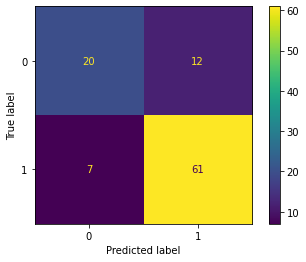

In [7]:
# 1.5
print("The logistic regression is " + str(accuracy_score(y_test, predictedVals) * 100) + "% accurate.")
plot_confusion_matrix(logReg, x_test, y_test)

The model did very well! Across multiple tests, the model ended up being between 80% and 90% accurate. The confusion matrices of each test also showed that there were always significantly more true positives and negatives than false of either. There was usually more false positives than false negatives (though for some trials they had equal false negatives and false positives, and for even fewer there were more false negatives than false positives).

In [8]:
# 2.1

s1LO =((coefs["Coef"][0] * 0.60) + 
       (coefs["Coef"][1] * 0.05) + 
       (coefs["Coef"][2] * 0.75) +  
       (coefs["Coef"][3] * 0.65) +  
       (coefs["Coef"][4] * 1.02) +  
       (coefs["Coef"][5] * 0.25) + 
       (coefs["Coef"][6] * 0) +
       (coefs["Coef"][7]))
s2LO =((coefs["Coef"][0] * 1.60) + 
       (coefs["Coef"][1] * 0.05) + 
       (coefs["Coef"][2] * 0.75) +  
       (coefs["Coef"][3] * 0.65) +  
       (coefs["Coef"][4] * 1.02) +  
       (coefs["Coef"][5] * 0.25) + 
       (coefs["Coef"][6] * 1) + 
       (coefs["Coef"][7]))

s1O = np.exp(s1LO)
s2O = np.exp(s2LO)

s1P = (s1O/(1+s1O))
s2P = (s2O/(1+s2O))


print("Student 1's log odds are: " + str(s1LO))
print("Student 2's log odds are: " + str(s2LO))
print("The difference between log odds is: " + str(s2LO-s1LO))
print()
print("Student 1's odds are: " + str(s1O))
print("Student 2's odds are: " + str(s2O))
print("The ratio between odds is: " + str(s2O/s1O)) 
print()
print("Student 1's probability is: " + str(s1P))
print("Student 2's probability is: " + str(s2P))


Student 1's log odds are: 3.6050251015625028
Student 2's log odds are: 5.000667766826887
The difference between log odds is: 1.3956426652643845

Student 1's odds are: 36.78260714656843
Student 2's odds are: 148.5122975839095
The ratio between odds is: 4.037568544071099

Student 1's probability is: 0.9735327952324533
Student 2's probability is: 0.9933115869653546


In [9]:
# 2.2

s3LO =((coefs["Coef"][0] * -1.25) + 
       (coefs["Coef"][1] * 0.24) + 
       (coefs["Coef"][2] * 0) +  
       (coefs["Coef"][3] * 0.56) +  
       (coefs["Coef"][4] * -1) +  
       (coefs["Coef"][5] * -0.1) + 
       (coefs["Coef"][6] * 1) +
       (coefs["Coef"][7]))
s4LO =((coefs["Coef"][0] * -0.25) + 
       (coefs["Coef"][1] * 0.24) + 
       (coefs["Coef"][2] * 0) +  
       (coefs["Coef"][3] * 0.56) +  
       (coefs["Coef"][4] * -1) +  
       (coefs["Coef"][5] * -0.1) + 
       (coefs["Coef"][6] * 1) +
       (coefs["Coef"][7]))

s3O = np.exp(s3LO)
s4O = np.exp(s4LO)

s3P = (s3O/(1+s3O))
s4P = (s4O/(1+s4O))


print("Student 3's log odds are: " + str(s3LO))
print("Student 4's log odds are: " + str(s4LO))
print("The difference between log odds is: " + str(s4LO-s3LO))
print()
print("Student 3's odds are: " + str(s3O))
print("Student 4's odds are: " + str(s4O))
print("The ratio between odds is: " + str(s4O/s3O)) 
print()
print("Student 3's probability is: " + str(s3P))
print("Student 4's probability is: " + str(s4P))

Student 3's log odds are: 1.3253685698435889
Student 4's log odds are: 2.0972680476519776
The difference between log odds is: 0.7718994778083887

Student 3's odds are: 3.763572238633797
Student 4's odds are: 8.143890772132487
The ratio between odds is: 2.163872580558936

Student 3's probability is: 0.7900735099827515
Student 4's probability is: 0.890637363796201


# 2.3

1. Both pairs have the same difference in log odds due to the one standard deviation difference in GRE Score between each student in each pair.
1. Both pairs have the same ratio of odds due to the change in GRE Score.
1. The difference and ratio for the probabilites is not consistent between the two pairs.
1. The log odds have the same difference because on a logarithmic scale (like the one used in this *logarithmic* regression), an increase by one standard deviation of any predictor will linearly increase the predicted log odds by the coefficient of the predictor that was modified. Odds are the same as log odds, just with an exponential transformation applied, and in exponential functions, the ratio by which a value increases will be consistent for any pair of inputs with the same difference. For probability, however, there is no simple relationship between an increase in a predictor and an increase in probability. The relationship does exist, but it is not consistent along the whole model.